In [1]:
# import library
import pandas as pd

# Q.1

In [2]:
# download the dataset from Yahoo finance
# save the .csv file in current directory

# Q.2

In [3]:
# read the datset
df_fb = pd.read_csv('FB.csv')
df_mmm = pd.read_csv('MMM.csv')
df_ibm = pd.read_csv('IBM.csv')
df_amzn = pd.read_csv('AMZN.csv')

# get only Date and Adj Close
df_fb = df_fb[['Date','Adj Close']]
df_mmm = df_mmm[['Date','Adj Close']]
df_ibm = df_ibm[['Date','Adj Close']]
df_amzn = df_amzn[['Date','Adj Close']]

# Q.3

In [4]:
# create Year,Month and Day column to find the last business day of each month

df_fb['Year'] = df_fb['Date'].apply(lambda x:x.split('-')[0])
df_fb['Month'] = df_fb['Date'].apply(lambda x:x.split('-')[1])
df_fb['Day'] = df_fb['Date'].apply(lambda x:x.split('-')[2])

df_mmm['Year'] = df_mmm['Date'].apply(lambda x:x.split('-')[0])
df_mmm['Month'] = df_mmm['Date'].apply(lambda x:x.split('-')[1])
df_mmm['Day'] = df_mmm['Date'].apply(lambda x:x.split('-')[2])

df_ibm['Year'] = df_ibm['Date'].apply(lambda x:x.split('-')[0])
df_ibm['Month'] = df_ibm['Date'].apply(lambda x:x.split('-')[1])
df_ibm['Day'] = df_ibm['Date'].apply(lambda x:x.split('-')[2])

df_amzn['Year'] = df_amzn['Date'].apply(lambda x:x.split('-')[0])
df_amzn['Month'] = df_amzn['Date'].apply(lambda x:x.split('-')[1])
df_amzn['Day'] = df_amzn['Date'].apply(lambda x:x.split('-')[2])

In [5]:
# get last business day for each months
last_date = df_amzn.groupby(['Year','Month'])['Date'].max()
last_date = last_date[:-1]
last_date = list(last_date)

# filter the dataset to contain Adj Close for last business day of each month

df_fb = df_fb.loc[df_fb['Date'].isin(last_date)]
df_fb.reset_index(drop=True,inplace=True)
df_fb = df_fb[['Date','Adj Close']]

df_mmm = df_mmm.loc[df_mmm['Date'].isin(last_date)]
df_mmm.reset_index(drop=True,inplace=True)
df_mmm = df_mmm[['Date','Adj Close']]

df_ibm = df_ibm.loc[df_ibm['Date'].isin(last_date)]
df_ibm.reset_index(drop=True,inplace=True)
df_ibm = df_ibm[['Date','Adj Close']]

df_amzn = df_amzn.loc[df_amzn['Date'].isin(last_date)]
df_amzn.reset_index(drop=True,inplace=True)
df_amzn = df_amzn[['Date','Adj Close']]

In [6]:
df_fb.head() # display few rows

,Date,Adj Close
0,2016-07-29,123.940002
1,2016-08-31,126.120003
2,2016-09-30,128.270004
3,2016-10-31,130.990005
4,2016-11-30,118.419998


In [7]:
df_mmm.head()

,Date,Adj Close
0,2016-07-29,153.941116
1,2016-08-31,155.664581
2,2016-09-30,153.050507
3,2016-10-31,143.558121
4,2016-11-30,150.107330


In [8]:
df_ibm.head()

,Date,Adj Close
0,2016-07-29,128.608139
1,2016-08-31,128.313599
2,2016-09-30,128.289398
3,2016-10-31,124.122078
4,2016-11-30,132.199585


In [9]:
df_amzn.head()

,Date,Adj Close
0,2016-07-29,758.809998
1,2016-08-31,769.159973
2,2016-09-30,837.309998
3,2016-10-31,789.820007
4,2016-11-30,750.570007


# Q.4

In [10]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

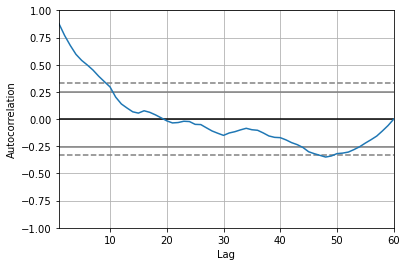

In [11]:
autocorrelation_plot(df_fb['Adj Close'])
plt.show()

- Yes, more recent values i.e smaller lags are strongly correlated with the current value than larger lags and at extreme large lags, the correlation is 0

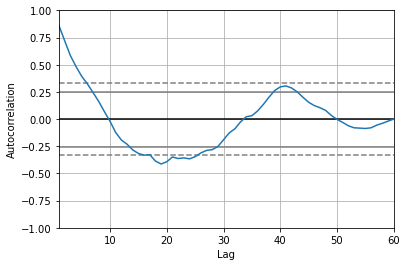

In [12]:
autocorrelation_plot(df_mmm['Adj Close'])
plt.show()

- Yes, more recent values i.e smaller lags are strongly correlated with the current value than larger lags and at extreme large lags, the correlation is 0

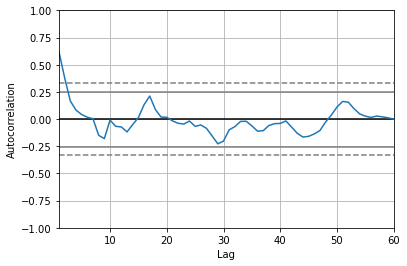

In [13]:
autocorrelation_plot(df_ibm['Adj Close'])
plt.show()

- - Yes, more recent values i.e smaller lags are strongly correlated with the current value than larger lags and at extreme large lags, the correlation is 0

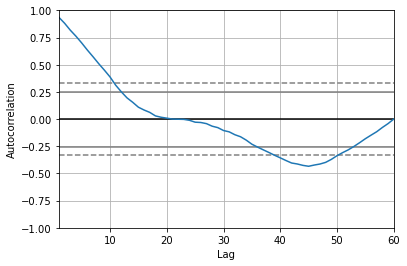

In [14]:
autocorrelation_plot(df_amzn['Adj Close'])
plt.show()

- Yes, more recent values i.e smaller lags are strongly correlated with the current value than larger lags and at extreme large lags, the correlation is 0

# Q.5.1

- Yes, more recent values i.e smaller lags are strongly correlated with the current value than larger lags and at extreme large lags, the correlation is 0

# Q.5.2

In [15]:
# compute monthly returns
df_fb['Return'] = (df_fb['Adj Close'] - df_fb['Adj Close'].shift(1))/df_fb['Adj Close'].shift(1)
df_mmm['Return'] = (df_mmm['Adj Close'] - df_mmm['Adj Close'].shift(1))/df_mmm['Adj Close'].shift(1)
df_ibm['Return'] = (df_ibm['Adj Close'] - df_ibm['Adj Close'].shift(1))/df_ibm['Adj Close'].shift(1)
df_amzn['Return'] = (df_amzn['Adj Close'] - df_amzn['Adj Close'].shift(1))/df_amzn['Adj Close'].shift(1)
 
# drop NAN rows
df_fb.dropna(inplace=True)
df_mmm.dropna(inplace=True)
df_ibm.dropna(inplace=True)
df_amzn.dropna(inplace=True)

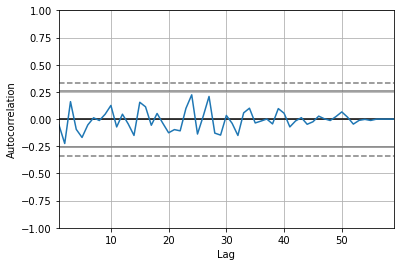

In [16]:
autocorrelation_plot(df_fb['Return'])
plt.show()

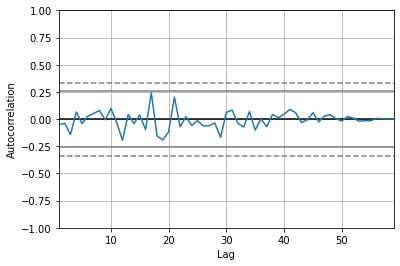

In [17]:
autocorrelation_plot(df_mmm['Return'])
plt.show()

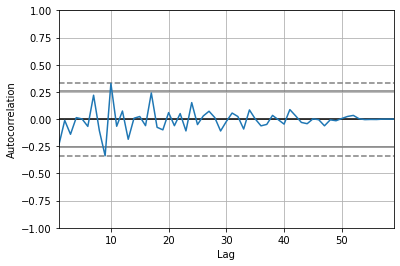

In [18]:
autocorrelation_plot(df_ibm['Return'])
plt.show()

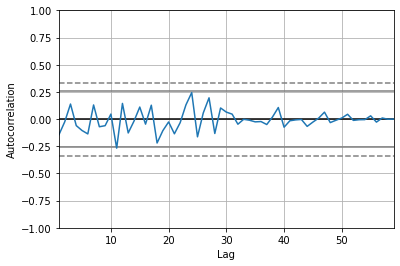

In [19]:
autocorrelation_plot(df_amzn['Return'])
plt.show()

- No,returns are not autocorrelated.With larger lags the correlation is 0 and even with small lags the correlation never go beyond 0.25

# combine all returns

In [20]:
dfs = [df_fb['Return'],df_mmm['Return'],df_ibm['Return'],df_amzn['Return']]

In [21]:
df = pd.concat(dfs, axis=1)

In [22]:
df.columns = ['Return_fb','Return_mmm','Return_ibm','Return_amzn']

In [23]:
df

,Return_fb,Return_mmm,Return_ibm,Return_amzn
1,0.017589,0.011196,-0.002290,0.013640
2,0.017047,-0.016793,-0.000189,0.088603
3,0.021205,-0.062021,-0.032484,-0.056717
4,-0.095962,0.045621,0.065077,-0.049695
5,-0.028458,0.039770,0.023240,-0.000933
6,0.132725,-0.021000,0.051389,0.098164
7,0.040055,0.072895,0.038516,0.026182
8,0.048030,0.026724,-0.031587,0.049110
9,0.057726,0.023520,-0.079534,0.043371
10,0.008053,0.050356,-0.038486,0.075276


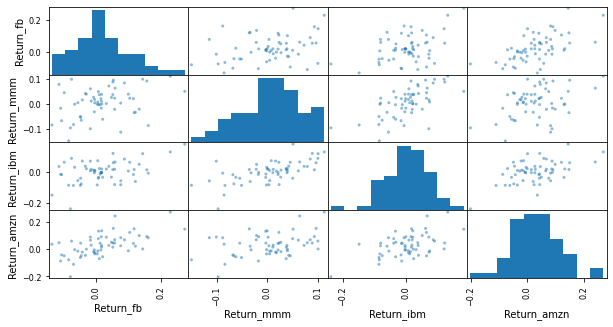

In [24]:
pd.plotting.scatter_matrix(df,figsize=(10,5))
plt.show()

- Based on above graph:
- returns of ibm and mmm are related
- returns of fb and amzn are related